<a href="https://colab.research.google.com/github/MuhammadShavaiz/AI_learning/blob/main/Text_Processing_and_Analysis_with_NLTK_%26_SpaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK 1: Corpus Import and Preprocessing

In [2]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
print(gutenberg.fileids())
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk_sentences = sent_tokenize(gutenberg.raw('austen-emma.txt'))
nltk_words = word_tokenize(gutenberg.raw('austen-emma.txt'))

In [4]:
print(f'sample of sentences: {nltk_sentences[:5]}')
print(f'sample of words: {nltk_words[:10]}')
print(f'number of sentences using nltk: {len(nltk_sentences)}')
print(f'number of words using nltk: {len(nltk_words)}')

sample of sentences: ['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.", 'Between _them_ it was more the intimacy\nof sisters.']
sample of words: ['[', 'Emma', 'by', 'J

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000
doc = nlp(gutenberg.raw('austen-emma.txt'))
spacy_sentences = list(doc.sents)
spacy_words = [token.text for token in doc]

In [6]:
print(f'sample of sentences: {spacy_sentences[:5]}')
print(f'sample of words: {spacy_words[:10]}')
print(f'number of sentences using nltk: {len(spacy_sentences)}')
print(f'number of words using nltk: {len(spacy_words)}')

sample of sentences: [[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

, She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  , Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

, Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  , Between _them_]
sample of words: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', '\n\n', 'VOLUME', 'I']
number

### TASK 2: POS Tagging and Named Entity Recognition (NER)

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

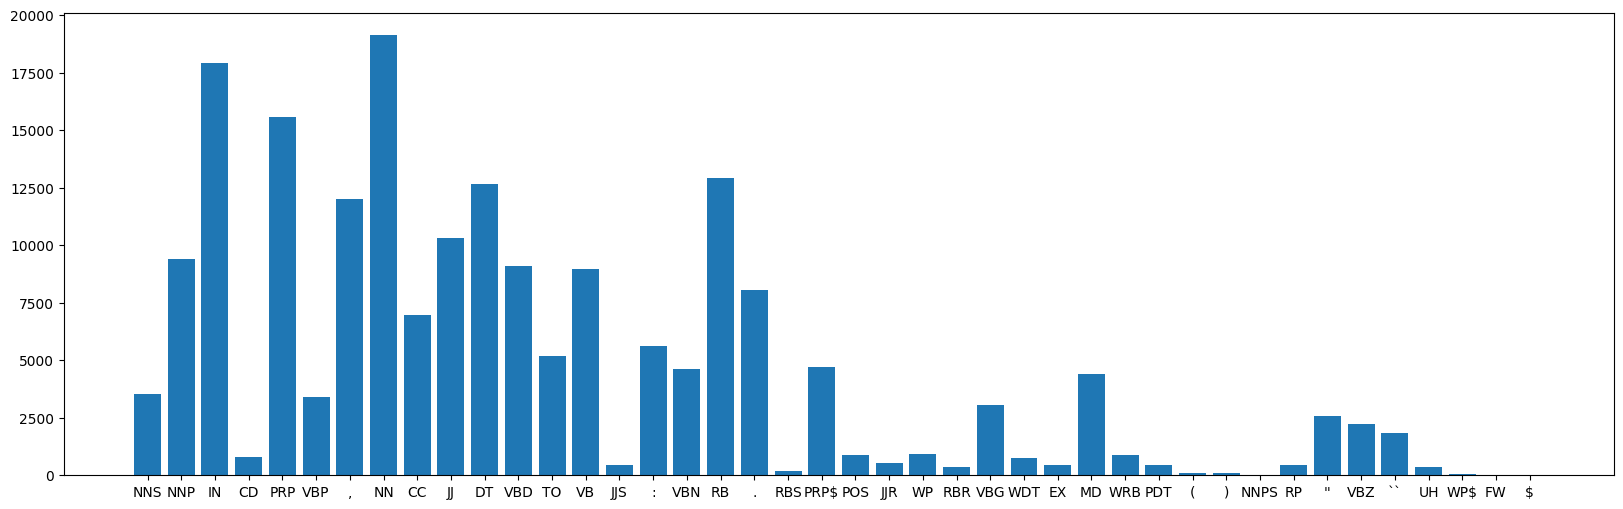

In [8]:
nltk_pos_tags = nltk.pos_tag(nltk_words)
nltk_pos_counts = Counter(tag for word, tag in nltk_pos_tags)
plt.figure(figsize=(20, 6))
plt.bar(nltk_pos_counts.keys(), nltk_pos_counts.values())
plt. savefig('nltk_pos_plot.png')
plt.show()

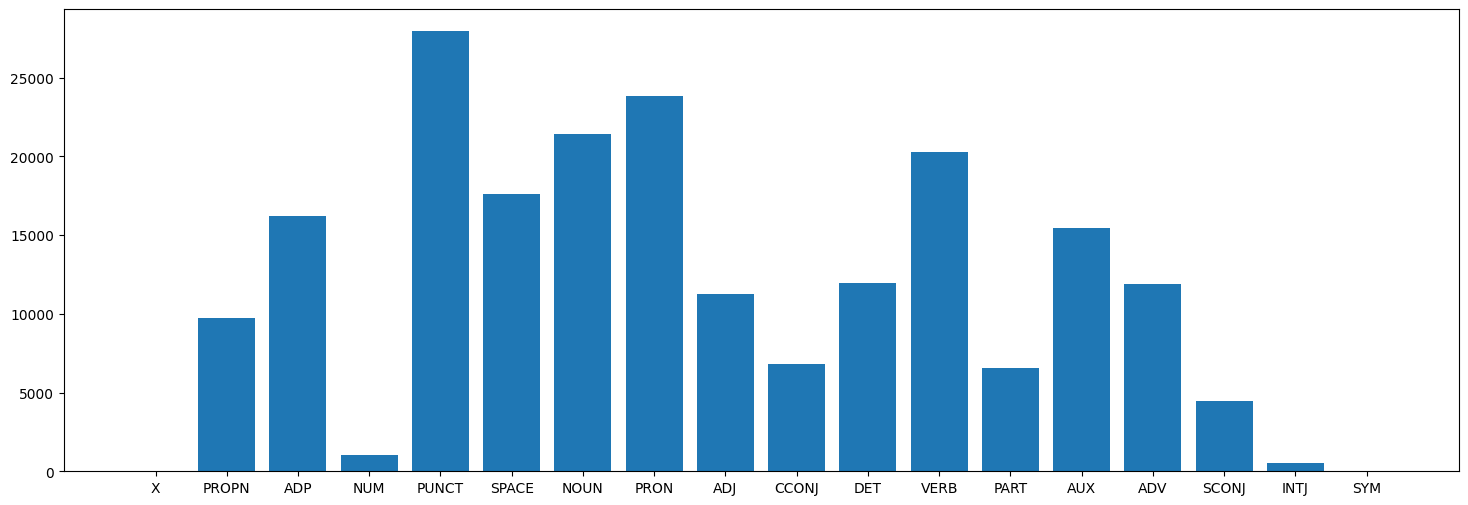

In [9]:
spacy_pos_tags = [token.pos_ for token in doc]
spacy_pos_counts = Counter(spacy_pos_tags)
plt.figure(figsize=(18, 6))
plt.bar(spacy_pos_counts.keys(), spacy_pos_counts.values())
plt.savefig('spacy_pos_plot.png')
plt.show()

In [10]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [11]:
nltk_ner = nltk.ne_chunk(nltk_pos_tags)
print(f'nltk ner sample: {nltk_ner[:10]}')

nltk ner sample: [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), Tree('PERSON', [('Jane', 'NNP'), ('Austen', 'NNP')]), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP')]


In [12]:
spacy_ner =  [(ent.text, ent.label_) for ent in doc.ents]
print(f'spacy ner sample: {spacy_ner[:10]}')

spacy ner sample: [('Emma', 'PERSON'), ('Jane Austen', 'PERSON'), ('1816', 'DATE'), ('Emma Woodhouse', 'PERSON'), ('nearly twenty-one years', 'CARDINAL'), ('two', 'CARDINAL'), ('a very early period', 'DATE'), ('Sixteen years', 'DATE'), ('Taylor', 'PERSON'), ('Woodhouse', 'PERSON')]


### TASK 3: Word Frequency and Sentence-to-Word Ratios

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


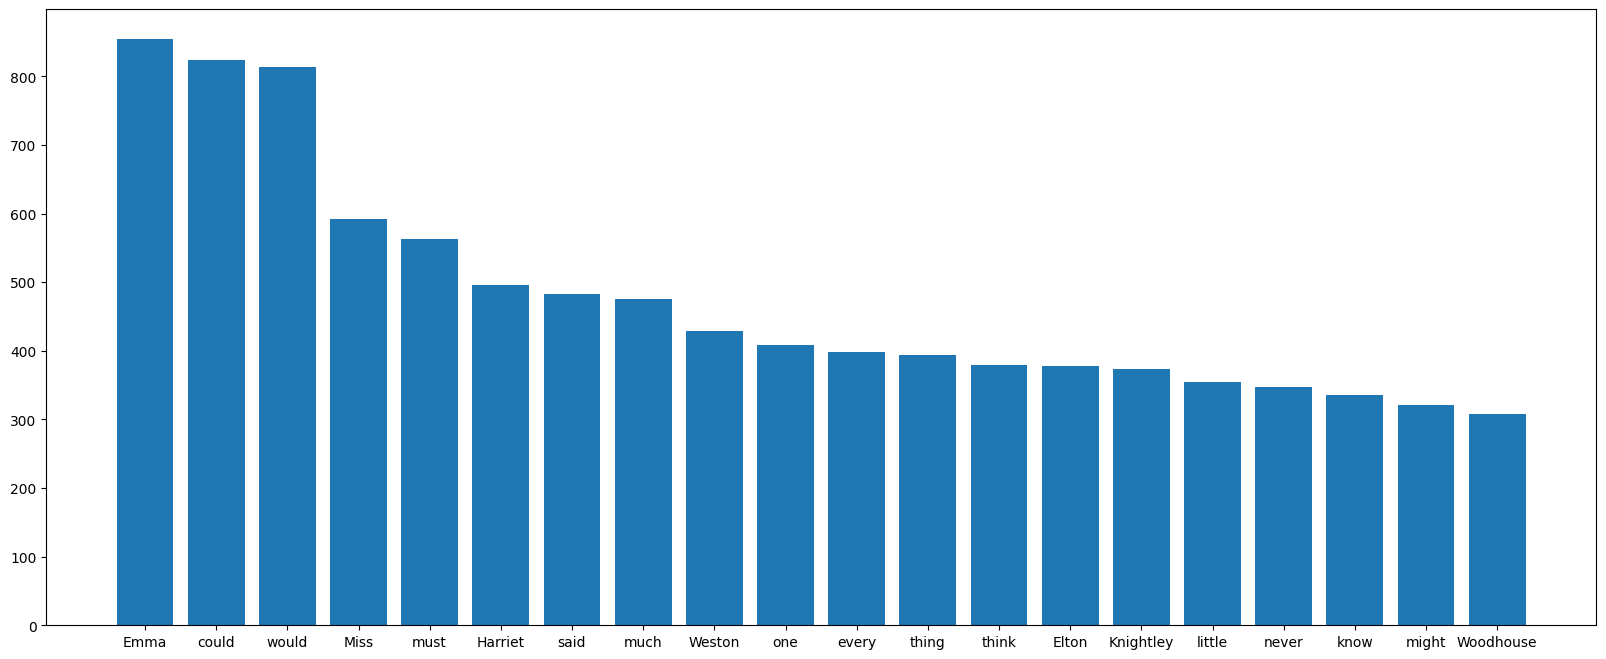

In [24]:
from nltk.corpus import stopwords
import re
nltk.download('stopwords')
nltk_stop_words = set(stopwords.words('english'))
nltk_filtered_words = [word for word in nltk_words if word.lower() not in nltk_stop_words  and re.match(r'^[a-z]+$', word.lower())]
nltk_word_freq = nltk.FreqDist(nltk_filtered_words)
most_common_words = nltk_word_freq.most_common(20)
plt.figure(figsize = (20,8))
plt.bar(*zip(*most_common_words))
plt.show()

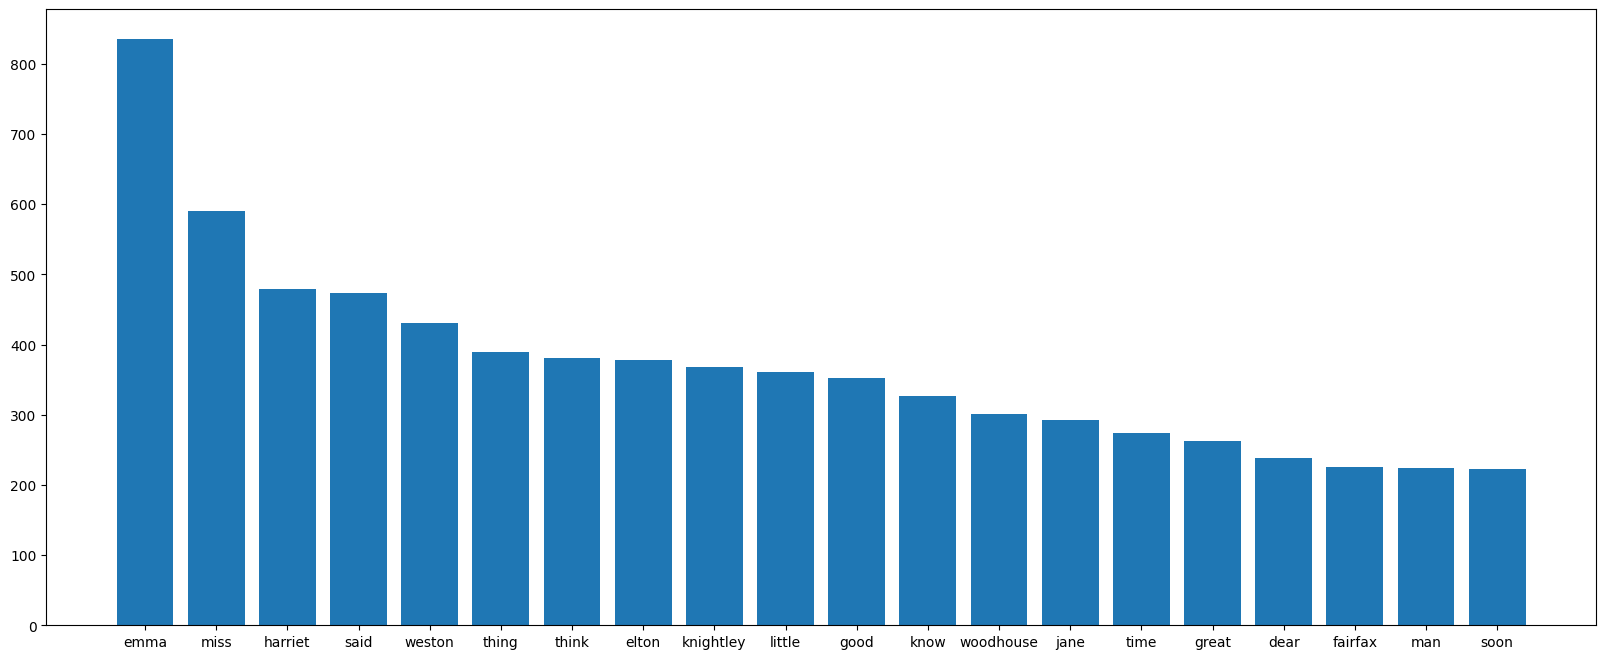

In [22]:
spacy_filtered_words = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
spacy_word_freq = Counter(spacy_filtered_words)
most_common_words = spacy_word_freq.most_common(20)
plt.figure(figsize=(20,8))
plt.bar(*zip(*most_common_words))
plt.show()

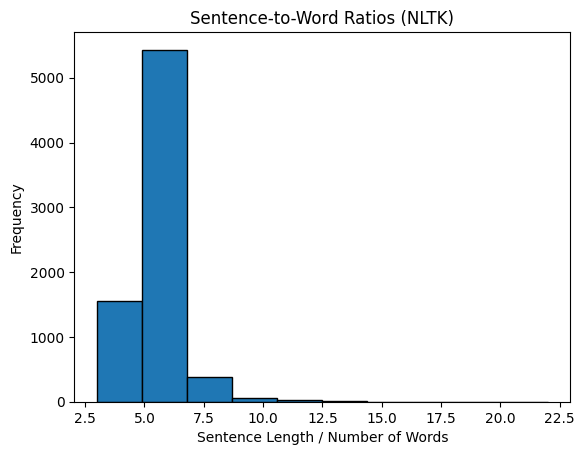

In [25]:
nltk_ratios = []
for sentence in nltk_sentences:
    nltk_sent_words = nltk.word_tokenize(sentence)
    num_words = len([word for word in nltk_sent_words if word.isalpha()])
    sentence_length = len(sentence)
    if num_words > 0:
        nltk_ratios.append(sentence_length / num_words)

plt.hist(nltk_ratios, bins=10, edgecolor='black')
plt.title('Sentence-to-Word Ratios (NLTK)')
plt.xlabel('Sentence Length / Number of Words')
plt.ylabel('Frequency')
plt.show()

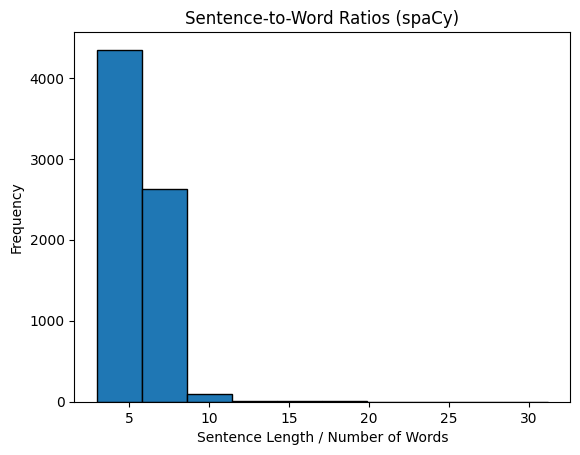

In [26]:
spacy_ratios = []
for sent in doc.sents:
    spacy_sent_words = [token.text for token in sent if token.is_alpha]
    num_words = len(spacy_sent_words)
    sentence_length = len(sent.text)
    if num_words > 0:
        spacy_ratios.append(sentence_length / num_words)

# Plot the histogram
plt.hist(spacy_ratios, bins=10, edgecolor='black')
plt.title('Sentence-to-Word Ratios (spaCy)')
plt.xlabel('Sentence Length / Number of Words')
plt.ylabel('Frequency')
plt.show()

### TASK 4: Advanced Parsing Syntax Trees and Dependency Parsing

In [70]:
most_complex_sentence_spacy = max(spacy_sentences, key=lambda s: len(s.text.split()))
print("Most complex sentence:", most_complex_sentence_spacy)
html = displacy.render(most_complex_sentence_spacy, style="dep", jupyter=True)

Most complex sentence: While he lived, it must be only an engagement;
but she flattered herself, that if divested of the danger of
drawing her away, it might become an increase of comfort to him.--
How to do her best by Harriet, was of more difficult decision;--
how to spare her from any unnecessary pain; how to make
her any possible atonement; how to appear least her enemy?--
On these subjects, her perplexity and distress were very great--
and her mind had to pass again and again through every bitter
reproach and sorrowful regret that had ever surrounded it.--
She could only resolve at last, that she would still avoid a
meeting with her, and communicate all that need be told by letter;
that it would be inexpressibly desirable to have her removed just
now for a time from Highbury, and--indulging in one scheme more--
nearly resolve, that it might be practicable to get an invitation
for her to Brunswick Square.--Isabella had been pleased with Harriet;
and a few weeks spent in London must

In [65]:
from spacy import displacy
import matplotlib.image as mpimg
from IPython.display import display, HTML

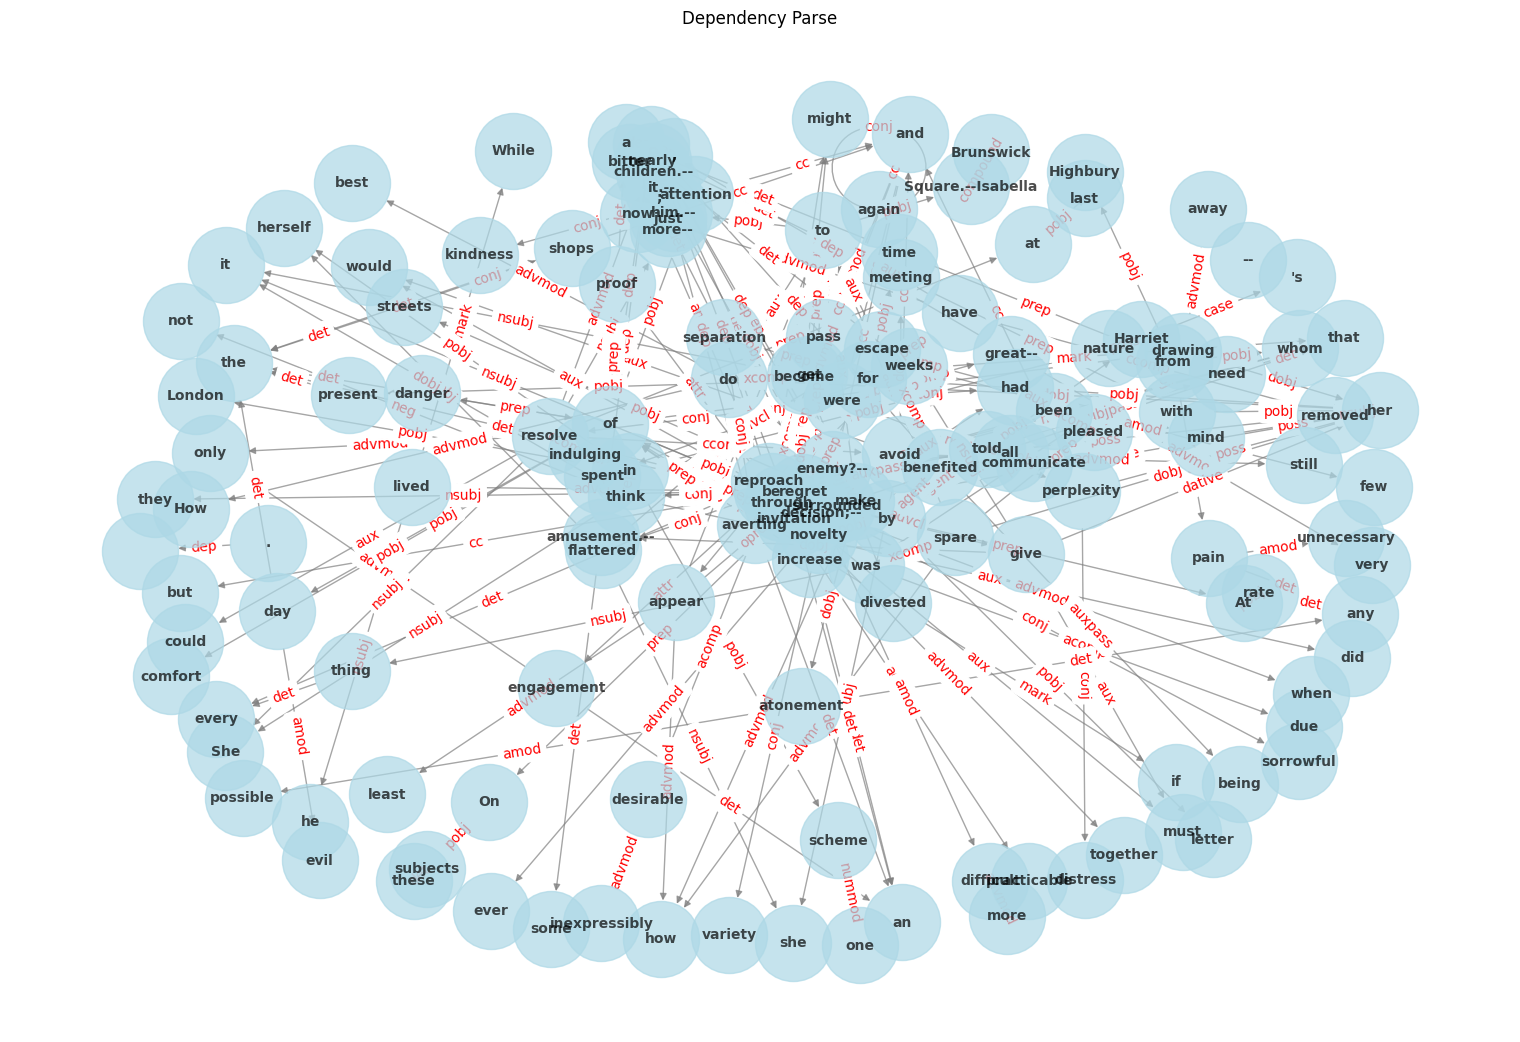

In [71]:
import networkx as nx
def plot_dependency_graph(doc):
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text, pos=token.pos_)
        if token.dep_ != "punct":
            G.add_edge(token.head.text, token.text, relation=token.dep_)
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(15, 10))
    nx.draw(G, pos, with_labels=True, arrows=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", width=1, alpha=0.7)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Dependency Parse")
    plt.show()
plot_dependency_graph(most_complex_sentence_spacy)

### TASK 5: POS and Word Ratios Visualization

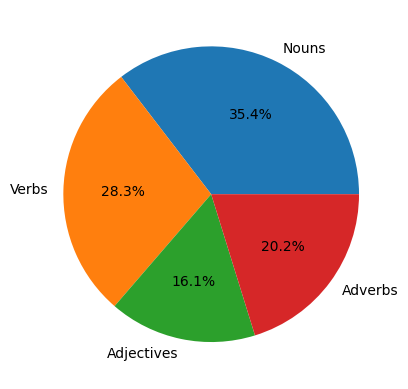

In [29]:
nltk_pos_ratios = {
 'Nouns': nltk_pos_counts['NN'] + nltk_pos_counts['NNS'],
 'Verbs': nltk_pos_counts['VB'] + nltk_pos_counts['VBD'],
 'Adjectives': nltk_pos_counts['JJ'],
 'Adverbs': nltk_pos_counts['RB']}
plt.pie(nltk_pos_ratios.values(), labels = nltk_pos_ratios.keys(), autopct='%1.1f%%')
plt.show()

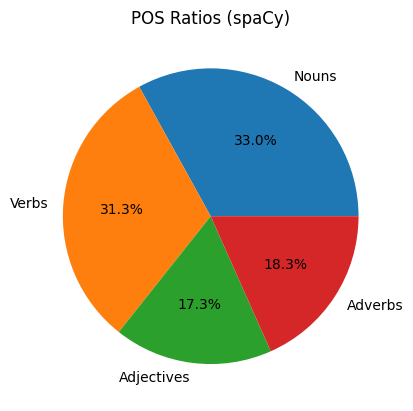

In [30]:
spacy_pos_ratios = {
    'Nouns': spacy_pos_counts['NOUN'],
    'Verbs': spacy_pos_counts['VERB'],
    'Adjectives': spacy_pos_counts['ADJ'],
    'Adverbs': spacy_pos_counts['ADV']
}

plt.pie(spacy_pos_ratios.values(), labels=spacy_pos_ratios.keys(), autopct='%1.1f%%')
plt.title('POS Ratios (spaCy)')
plt.show()